<a href="https://www.kaggle.com/code/niteshk97/lstm-text-generator?scriptVersionId=157384952" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Long Short-Term Memory (LSTM) networks are a specialized type of recurrent neural network (RNN) designed to effectively capture and retain long-term dependencies in sequential data. Unlike traditional RNNs, LSTMs excel at mitigating issues like vanishing and exploding gradients, making them particularly well-suited for tasks that involve learning over extended sequences. These networks comprise repeating modules with intricate structures, featuring gates that regulate the flow of information. LSTMs are widely utilized due to their inherent capability to overcome challenges associated with learning and remembering information over extended periods.

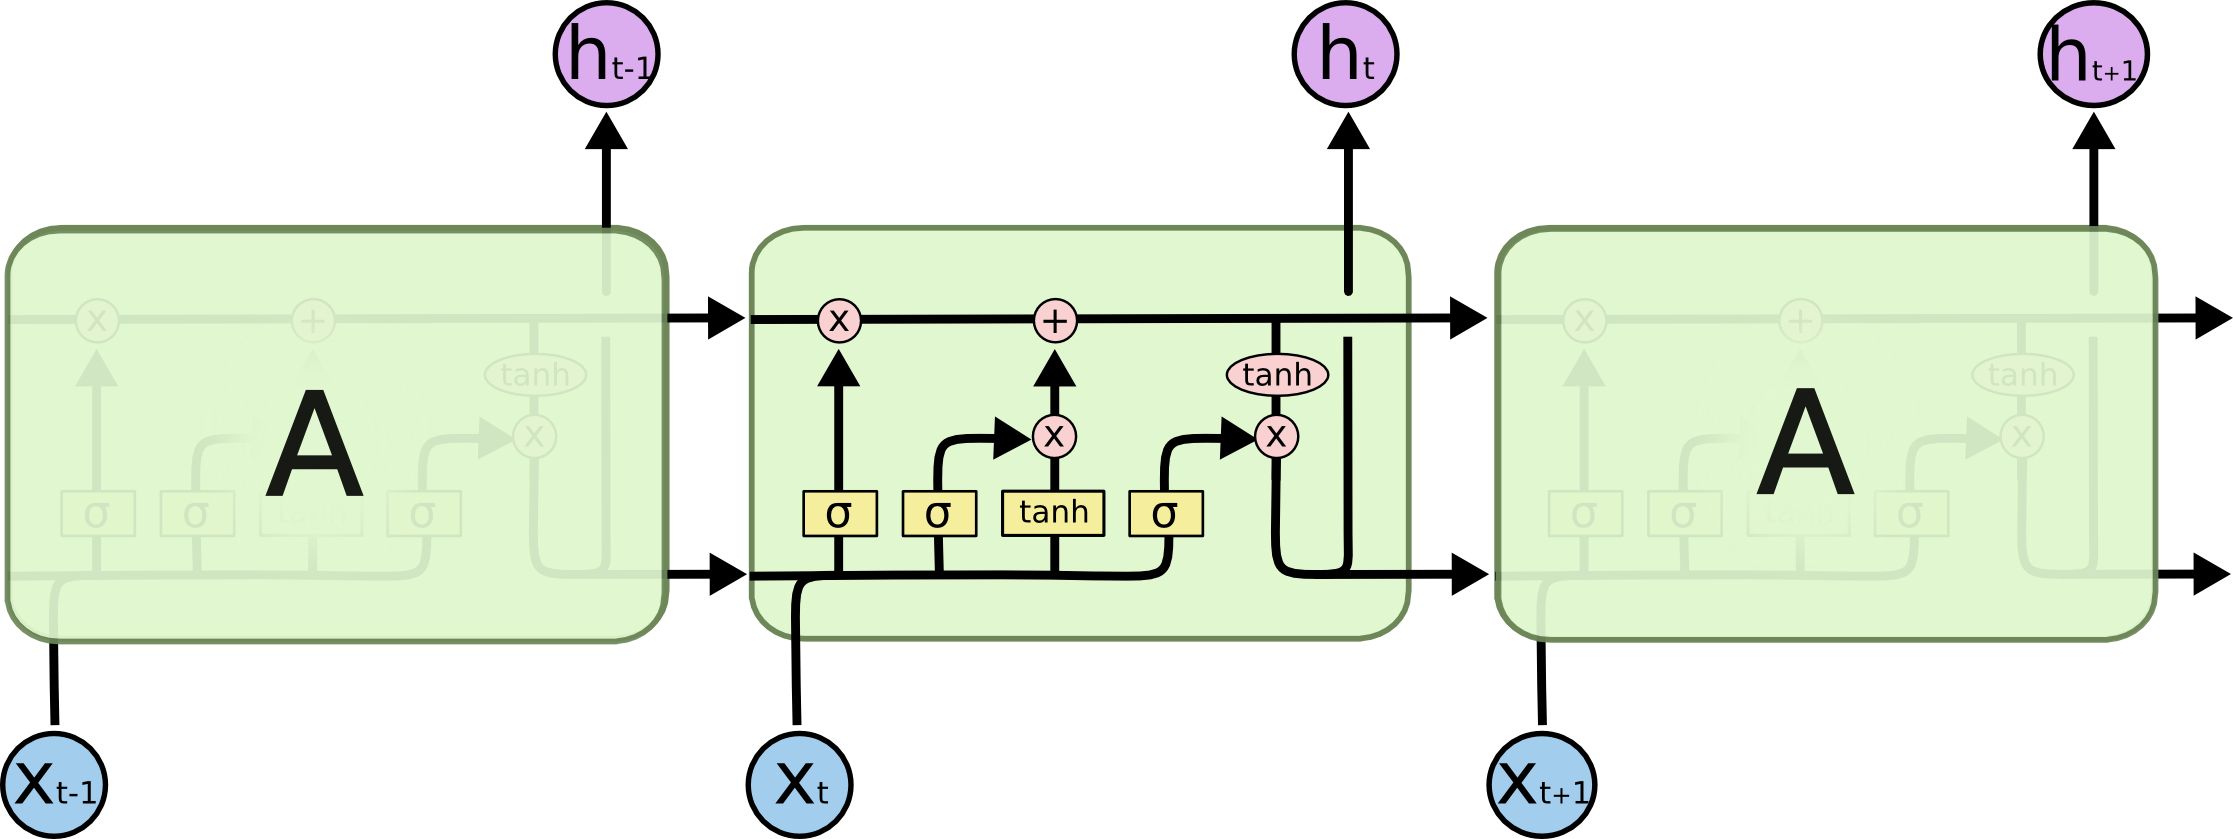

# The key to LSTMs is the cell state, the horizontal line running through the top of the diagram.The cell state is kind of like a conveyor belt. It runs straight down the entire chain, with only some minor linear interactions. It’s very easy for information to just flow along it unchanged.

**---------------------------------------------------------------------------------------------------------------------------------------------**

# Now, let's proceed with a practical example to see how an LSTM can be implemented using sample data. This demonstration will showcase the network's ability to learn and predict patterns in sequential information.

In [1]:
data='''So far in the book, we’ve addressed a range of NLP problems, starting from what
an NLP pipeline looks like to how NLP is applied in different domains. Efficiently
applying what we’ve learned to build end-to-end software products involving NLP
takes more than just stitching together various steps in an NLP pipeline—there
are several decision points during the process. While a lot of this knowledge
comes only with experience, we’ve distilled some of our knowledge about the
end-to-end NLP process in this chapter to help you hit the ground running faster
and better.
In Chapter 2, we already saw what a typical pipeline for an NLP system looks like.
How is this chapter then any different from that? In Chapter 2, we focused pri￾marily on the technical aspects of the pipeline—for example, how do we repre￾sent text? What pre-processing steps should we do? How do we build a model,
and then how do we evaluate it? In the subsequent chapters in Parts I and II of
the book, we delved deeper into different algorithms to perform various NLP
tasks. We also saw how NLP is used in various industry domains, such as health￾care, e-commerce, and social media. However, in all these chapters, we spent little
time on the issues related to deploying and maintaining such systems and on the
processes to follow when managing such projects. These are the focus of this
chapter. Most of the points discussed here are broadly applicable not just to NLP,
but also to other concepts, such as data science (DS), machine learning, artificial
intelligence (AI), etc. Throughout this chapter, we use these terms interchange￾ably; where the focus is specifically on NLP tasks, we mention that explicitly.
We’ll start the discussion by revisiting the NLP pipeline we introduced in
Chapter 2 and take a look at the last two steps: deployment, followed by monitor￾ing and updating the model, which we didn’t cover in earlier chapters. We’ll also
see what it takes to build and maintain a mature NLP system. This is followed by a
discussion on the data science processes followed in various AI teams, especially
with respect to building NLP software in particular. We’ll conclude the chapter
with a lot of recommendations, best practices, and do’s and don’ts to successfully
deliver NLP projects. Let’s start by looking at how to deploy NLP software.
Revisiting the NLP Pipeline: Deploying NLP
Software
In Chapter 2, we saw that a typical production pipeline for NLP projects consists
of the following stages: data acquisition, text cleaning, text pre-processing, text
representation and feature engineering, modeling, evaluation, deployment, moni￾toring, and model updating. When we encounter a new problem scenario involv￾ing NLP in our organization, we have to first start thinking about creating an NLP
pipeline covering these stages. Some of the questions we should ask ourselves in
this process are:
What kind of data do we need for training the NLP system? Where do we get
this data from? These questions are important at the start and also later as the
model matures.
How much data is available? If it’s not enough, what data augmentation tech￾niques can we try?
How will we label the data, if necessary?
How will we quantify the performance of our model? What metrics will we
use to do that?
How will we deploy the system? Using API calls over the cloud, or a monolith
system, or an embedded module on an edge device?
How will the predictions be served: streaming or batch process?
Would we need to update the model? If yes, what will the update frequency be:
daily, weekly, monthly?
Do we need a monitoring and alerting mechanism for model performance? If
yes, what kind of mechanism do we need and how will we put it in place?
Once we’ve thought through these key decision points, a broad design of our pipe￾line is ready! We can then start to focus on building version 1 of the model with
strong baselines, implementing the pipeline, deploying the model, and from there,
iteratively improving our solution. In Chapter 2, we saw how different stages of
the NLP pipeline before deployment are implemented for various NLP tasks. Let’s
now take a look at the final stages of the pipeline: deployment, monitoring, and
model updating.
What does deployment mean? Any NLP model we build is typically a part of some
larger software system. Once our model is working well in isolation, we plug it
into a larger system and ensure that everything is working well. The set of all of
the tasks related to integrating the model with the rest of the software and making it production-ready is called deployment. Typical steps in deployment of a
model include:
1. Model packaging: If the model is large, it might need to be saved in persistent
cloud storage, such as AWS S3, Azure Blob Storage, or Google Cloud Storage, for
easy access. It might also be serialized and wrapped up in a library call for
easy access. There are also open formats like ONNX [1] that provide interoperability across different frameworks.
2. Model serving: The model can be made available as a web service for other services to consume. In cases where a more tightly coupled system and batch
process is more applicable, the model could be part of a task flow system like
Airflow [2], Oozie [3], or Chef [4], instead of a web service. Microsoft has also
released reference pipelines for MLOps [5] and MLOps in Python [6].
3. Model scaling: Models that are hosted as web services should be able to scale
with respect to request traffic. Models that are running as part of a batch service should also be able to scale with respect to the input batch size. Public
cloud platforms as well as on-premise cloud systems have technologies that
enable that. Figure 11-1 shows one such pipeline for text classification on AWS.
More details on the engineering of this pipeline can be found in the AWS post'''

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer


In [3]:
tokenizer=Tokenizer()

**firstly, I assign an index to every word using the Tokenizer class from Keras.**

In [4]:
tokenizer.fit_on_texts([data])

In [5]:
tokenizer.word_index

{'the': 1,
 'we': 2,
 'in': 3,
 'of': 4,
 'nlp': 5,
 'to': 6,
 'a': 7,
 'and': 8,
 'model': 9,
 'how': 10,
 'is': 11,
 'what': 12,
 'pipeline': 13,
 'for': 14,
 'that': 15,
 'on': 16,
 'are': 17,
 'this': 18,
 'system': 19,
 'do': 20,
 'as': 21,
 'be': 22,
 'also': 23,
 'data': 24,
 'with': 25,
 'it': 26,
 'deployment': 27,
 'will': 28,
 'an': 29,
 'software': 30,
 'our': 31,
 'such': 32,
 'these': 33,
 'different': 34,
 'various': 35,
 'process': 36,
 'chapter': 37,
 'chapter\xa02': 38,
 'text': 39,
 'start': 40,
 'need': 41,
 'if': 42,
 'cloud': 43,
 'or': 44,
 'we’ve': 45,
 'from': 46,
 'like': 47,
 'build': 48,
 'end': 49,
 'more': 50,
 'steps': 51,
 'saw': 52,
 'should': 53,
 'tasks': 54,
 'by': 55,
 'at': 56,
 'stages': 57,
 'can': 58,
 'batch': 59,
 '1': 60,
 'points': 61,
 'some': 62,
 'typical': 63,
 'then': 64,
 'chapters': 65,
 'deploying': 66,
 'projects': 67,
 'focus': 68,
 'where': 69,
 'we’ll': 70,
 'followed': 71,
 'updating': 72,
 'respect': 73,
 'part': 74,
 'well': 7

In [6]:
len(tokenizer.word_index)

387

**Now, the second step is to break down the data into sentences.**

In [7]:
for sentence in data.split('\n'):
    print(sentence)

So far in the book, we’ve addressed a range of NLP problems, starting from what
an NLP pipeline looks like to how NLP is applied in different domains. Efficiently
applying what we’ve learned to build end-to-end software products involving NLP
takes more than just stitching together various steps in an NLP pipeline—there
are several decision points during the process. While a lot of this knowledge
comes only with experience, we’ve distilled some of our knowledge about the
end-to-end NLP process in this chapter to help you hit the ground running faster
and better.
In Chapter 2, we already saw what a typical pipeline for an NLP system looks like.
How is this chapter then any different from that? In Chapter 2, we focused pri￾marily on the technical aspects of the pipeline—for example, how do we repre￾sent text? What pre-processing steps should we do? How do we build a model,
and then how do we evaluate it? In the subsequent chapters in Parts I and II of
the book, we delved deeper into diff

**By using the text-to-sequence method, convert the sentences into numbers**

In [8]:
for sentence in data.split('\n'):
    print(tokenizer.texts_to_sequences([sentence])[0])

[137, 138, 3, 1, 79, 45, 139, 7, 140, 4, 5, 141, 142, 46, 12]
[29, 5, 13, 80, 47, 6, 10, 5, 11, 143, 3, 34, 81, 144]
[145, 12, 45, 146, 6, 48, 49, 6, 49, 30, 147, 148, 5]
[82, 50, 149, 83, 150, 151, 35, 51, 3, 29, 5, 152]
[17, 153, 84, 61, 154, 1, 36, 155, 7, 85, 4, 18, 86]
[156, 157, 25, 158, 45, 159, 62, 4, 31, 86, 87, 1]
[49, 6, 49, 5, 36, 3, 18, 37, 6, 160, 161, 162, 1, 163, 88, 164]
[8, 165]
[3, 38, 2, 166, 52, 12, 7, 63, 13, 14, 29, 5, 19, 80, 47]
[10, 11, 18, 37, 64, 89, 34, 46, 15, 3, 38, 2, 167, 168, 16, 1, 169, 170, 4, 1, 171, 172, 10, 20, 2, 173, 39, 12, 90, 91, 51, 53, 2, 20, 10, 20, 2, 48, 7, 9]
[8, 64, 10, 20, 2, 174, 26, 3, 1, 175, 65, 3, 176, 177, 8, 178, 4]
[1, 79, 2, 179, 180, 92, 34, 181, 6, 182, 35, 5]
[54, 2, 23, 52, 10, 5, 11, 183, 3, 35, 184, 81, 32, 21, 185, 186, 187, 8, 188, 189, 190, 3, 93, 33, 65, 2, 191, 192]
[193, 16, 1, 194, 94, 6, 66, 8, 195, 32, 95, 8, 16, 1]
[96, 6, 196, 97, 197, 32, 67, 33, 17, 1, 68, 4, 18]
[37, 198, 4, 1, 61, 199, 200, 17, 201, 98, 9

**Generate input sequences by tokenizing each sentence in the data and creating sublists for each sentence with an increasing number of tokens in each sublist**

In [9]:
input_sequences=[]
for sentence in data.split('\n'):
    tokenized_sentence=tokenizer.texts_to_sequences([sentence])[0]
    
    for i in range(1,len(tokenized_sentence)):
        input_sequences.append(tokenized_sentence[:i+1])

In [10]:
input_sequences

[[137, 138],
 [137, 138, 3],
 [137, 138, 3, 1],
 [137, 138, 3, 1, 79],
 [137, 138, 3, 1, 79, 45],
 [137, 138, 3, 1, 79, 45, 139],
 [137, 138, 3, 1, 79, 45, 139, 7],
 [137, 138, 3, 1, 79, 45, 139, 7, 140],
 [137, 138, 3, 1, 79, 45, 139, 7, 140, 4],
 [137, 138, 3, 1, 79, 45, 139, 7, 140, 4, 5],
 [137, 138, 3, 1, 79, 45, 139, 7, 140, 4, 5, 141],
 [137, 138, 3, 1, 79, 45, 139, 7, 140, 4, 5, 141, 142],
 [137, 138, 3, 1, 79, 45, 139, 7, 140, 4, 5, 141, 142, 46],
 [137, 138, 3, 1, 79, 45, 139, 7, 140, 4, 5, 141, 142, 46, 12],
 [29, 5],
 [29, 5, 13],
 [29, 5, 13, 80],
 [29, 5, 13, 80, 47],
 [29, 5, 13, 80, 47, 6],
 [29, 5, 13, 80, 47, 6, 10],
 [29, 5, 13, 80, 47, 6, 10, 5],
 [29, 5, 13, 80, 47, 6, 10, 5, 11],
 [29, 5, 13, 80, 47, 6, 10, 5, 11, 143],
 [29, 5, 13, 80, 47, 6, 10, 5, 11, 143, 3],
 [29, 5, 13, 80, 47, 6, 10, 5, 11, 143, 3, 34],
 [29, 5, 13, 80, 47, 6, 10, 5, 11, 143, 3, 34, 81],
 [29, 5, 13, 80, 47, 6, 10, 5, 11, 143, 3, 34, 81, 144],
 [145, 12],
 [145, 12, 45],
 [145, 12, 45, 146]

**Now, zero-padding is required because the sizes of the input sequences vary, and I am treating this as a supervised machine learning problem.**

In [11]:
max_len=max([len(x) for x in input_sequences])

In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [13]:
padding_input_sequences=pad_sequences(input_sequences, maxlen=max_len,padding='pre')

In [14]:
padding_input_sequences

array([[  0,   0,   0, ...,   0, 137, 138],
       [  0,   0,   0, ..., 137, 138,   3],
       [  0,   0,   0, ..., 138,   3,   1],
       ...,
       [  0,   0,   0, ..., 386,   3,   1],
       [  0,   0,   0, ...,   3,   1,  77],
       [  0,   0,   0, ...,   1,  77, 387]], dtype=int32)

**divide the data into input and output**

In [15]:
x=padding_input_sequences[:,:-1]

In [16]:
y=padding_input_sequences[:,-1]

In [17]:
x.shape

(926, 39)

In [18]:
y.shape  #387

(926,)

In [19]:
from tensorflow.keras.utils import to_categorical
y=to_categorical(y,num_classes=388)

In [20]:
y.shape

(926, 388)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding , LSTM , Dense

In [22]:
model=Sequential()
model.add(Embedding(388,100,input_length=39))
model.add(LSTM(150))
model.add(Dense(388, activation='softmax'))

In [23]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 39, 100)           38800     
                                                                 
 lstm (LSTM)                 (None, 150)               150600    
                                                                 
 dense (Dense)               (None, 388)               58588     
                                                                 
Total params: 247988 (968.70 KB)
Trainable params: 247988 (968.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/50
29/29 [==============================] - 5s 58ms/step - loss: 5.8075 - accuracy: 0.0389
Epoch 2/50
29/29 [==============================] - 1s 52ms/step - loss: 5.4167 - accuracy: 0.0497
Epoch 3/50
29/29 [==============================] - 1s 51ms/step - loss: 5.3300 - accuracy: 0.0497
Epoch 4/50
29/29 [==============================] - 1s 51ms/step - loss: 5.2971 - accuracy: 0.0497
Epoch 5/50
29/29 [==============================] - 1s 49ms/step - loss: 5.2663 - accuracy: 0.0540
Epoch 6/50
29/29 [==============================] - 1s 50ms/step - loss: 5.2155 - accuracy: 0.0508
Epoch 7/50
29/29 [==============================] - 1s 49ms/step - loss: 5.1346 - accuracy: 0.0626
Epoch 8/50
29/29 [==============================] - 2s 53ms/step - loss: 5.0305 - accuracy: 0.0842
Epoch 9/50
29/29 [==============================] - 1s 50ms/step - loss: 4.8819 - accuracy: 0.1004
Epoch 10/50
29/29 [==============================] - 1s 50ms/step - loss: 4.6966 - accuracy: 0.1177
Epoch 11/

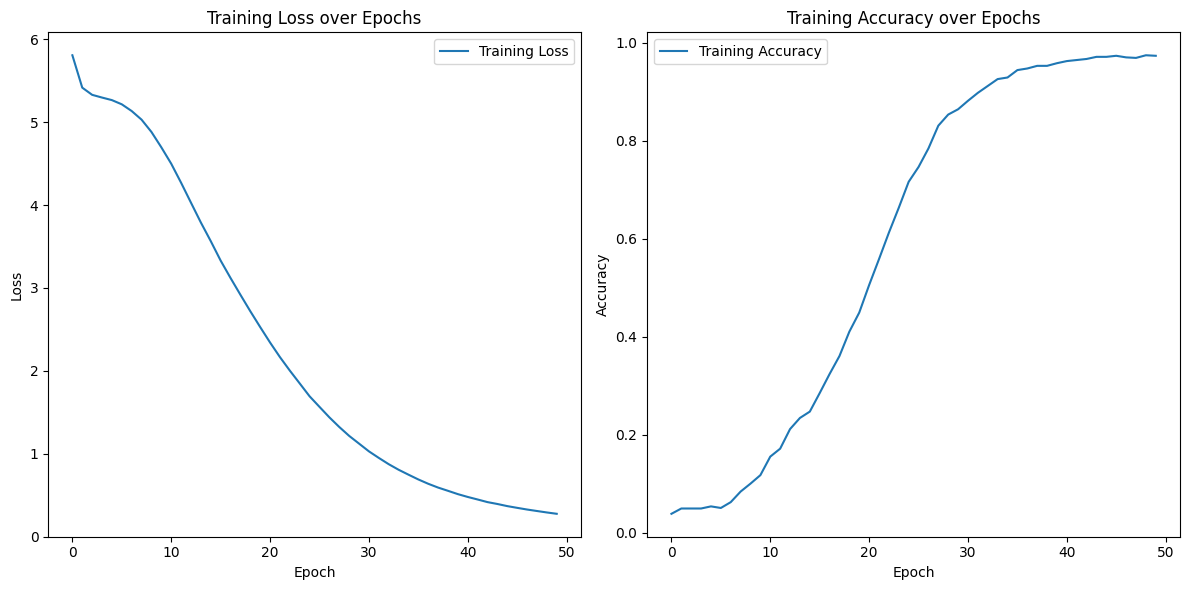

In [25]:
import matplotlib.pyplot as plt


history = model.fit(x, y, epochs=50)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [26]:
#prediction
text="algorithms"
token_text=tokenizer.texts_to_sequences([text])[0]
padded_token_text=pad_sequences([token_text],maxlen=39,padding='pre')

In [27]:
padded_token_text

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 181]],
      dtype=int32)

In [28]:
#prediction
text="How much data is available?"
for i in range(15):
    token_text=tokenizer.texts_to_sequences([text])[0]
    padded_token_text=pad_sequences([token_text],maxlen=39,padding='pre')
    pos=np.argmax(model.predict(padded_token_text))
    
    for word,index in tokenizer.word_index.items():
        if index==pos:
            
            text=text + " "+ word
            print(text)

1/1 [==============================] - 1s 526ms/step
How much data is available? if
1/1 [==============================] - 0s 28ms/step
How much data is available? if it’s
1/1 [==============================] - 0s 29ms/step
How much data is available? if it’s not
1/1 [==============================] - 0s 35ms/step
How much data is available? if it’s not enough
1/1 [==============================] - 0s 31ms/step
How much data is available? if it’s not enough what
1/1 [==============================] - 0s 30ms/step
How much data is available? if it’s not enough what data
1/1 [==============================] - 0s 28ms/step
How much data is available? if it’s not enough what data augmentation
1/1 [==============================] - 0s 32ms/step
How much data is available? if it’s not enough what data augmentation tech￾niques
1/1 [==============================] - 0s 36ms/step
How much data is available? if it’s not enough what data augmentation tech￾niques can
1/1 [=========================

In [29]:
def generate_text(model, tokenizer, seed_text, max_length, num_words=10):
    generated_text = seed_text
    for _ in range(num_words):
        token_text = tokenizer.texts_to_sequences([seed_text])[0]
        padded_token_text = pad_sequences([token_text], maxlen=max_length, padding='pre')
        pos = np.argmax(model.predict(padded_token_text))
        next_word = [word for word, index in tokenizer.word_index.items() if index == pos][0]
        seed_text += " " + next_word
        generated_text += " " + next_word
    return generated_text

# demo

seed_text2 ="How much data is available?"
generated_text2 = generate_text(model, tokenizer, seed_text2, max_length=39, num_words=10)
print("\nGenerated Text 2:", generated_text2)


1/1 [==============================] - 0s 28ms/step

Generated Text 2: How much data is available? if it’s not enough what data augmentation tech￾niques can we


# Summary

**In this notebook shows how to use an LSTM neural network to generate text. It covers steps like preparing the data, setting up the model, and training it. The code is well-documented with comments, making it helpful for anyone wanting to learn about LSTM networks for natural language processing**